In [1]:
!pip install tensorflow-gpu

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import os

In [0]:
url_train = '/gdrive/My Drive/sisrec/training'
url_test = '/gdrive/My Drive/sisrec/test'

## RESHAPE IMAGE INTO SQUARE

Measure that your data is square image, if not please do some image processing

In [0]:
im_size = (256, 256)
im_size2 = (256, 256, 3)

In [0]:
from tensorflow.keras import Sequential

## GENERATE DATATRAIN

In [15]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2, height_shift_range = 0.2,
    zoom_range = 0.2
)
# Gvfet data from folder
data_train = datagen.flow_from_directory(url_train,
                                         target_size = im_size,
                                         batch_size = 100,
                                         class_mode = 'categorical'
                                         )



Found 840 images belonging to 2 classes.


In [16]:
data_train.class_indices

{'Laki-laki': 0, 'Perempuan': 1}

## CNN ARCHITECTURE


In [0]:
model = Sequential([
        Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = im_size2),
        MaxPool2D(),                                            
        Conv2D(64, 3, padding = 'same', activation = 'relu'),
        MaxPool2D(),                                            
        Conv2D(128, 3, padding = 'same', activation = 'relu'),
        MaxPool2D(),
        Conv2D(256, 3, padding = 'same', activation = 'relu'),
        MaxPool2D(),
        Conv2D(512, 3, padding = 'same', activation = 'relu'),
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(data_train.num_classes, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Make some checkpoint during training

In [0]:
checkpoint_path = "/gdrive/My Drive/sisrec/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [19]:
history = model.fit_generator(data_train, epochs = 100, callbacks=[cp_callback])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 9 steps
Epoch 1/100
8/9 [=========================>....] - ETA: 1s - loss: 0.6952 - accuracy: 0.4953
Epoch 00001: saving model to /gdrive/My Drive/sisrec/cp.ckpt
9/9 [==============================] - 14s 2s/step - loss: 0.6950 - accuracy: 0.5030
Epoch 2/100
8/9 [=========================>....] - ETA: 1s - loss: 0.6933 - accuracy: 0.5169
Epoch 00002: saving model to /gdrive/My Drive/sisrec/cp.ckpt
9/9 [==============================] - 12s 1s/step - loss: 0.6932 - accuracy: 0.5167
Epoch 3/100
8/9 [=========================>....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5162
Epoch 00003: saving model to /gdrive/My Drive/sisrec/cp.ckpt
9/9 [==============================] - 12s 1s/step - loss: 0.6918 - accuracy: 0.5167
Epoch 4/100
8/9 [=========================>....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5284
Epoch 00004: saving model to /gdrive/My Drive/sisrec/cp.ckpt
9/9 [=====

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 256)      

## We dont prepare datatest yet, sorry, It wil be here soon :)

In [21]:
model.evaluate_generator(data_train)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.22733226418495178, 0.8964286]

In [0]:
model.save('/gdrive/My Drive/sisrec/model_1.h5')

## LOAD MODEL

In [0]:
from tensorflow.keras.models import load_model

model = load_model('/gdrive/My Drive/sisrec/model_1.h5')

## LET'S PREDICT

In [0]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

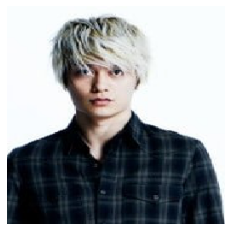

In [58]:
img = load_img('/gdrive/My Drive/sisrec/test/toru.jpg', target_size = im_size)
plt.imshow(img)
plt.axis('off')
plt.show()

In [59]:
img = np.array(img, dtype='float')
img = img.reshape(1, 256, 256, 3)
prediksi = model.predict(img)
idx = np.argmax(prediksi)
print(idx)

0


In [60]:
labels = [v for v in data_train.class_indices.keys()]
print("Dia seorang", labels[idx])

Dia seorang Laki-laki
